# Transformação e Normalização

## Transformação
A etapa de transformação de dados envolve converter e manipular os dados brutos para um formato adequado à análise. Isso inclui a aplicação de técnicas que podem melhorar a estrutura e a qualidade dos dados, como a criação de novas variáveis, conversão de tipos de dados, tratamento de variáveis categóricas (como _One-Hot Encoding_), e cálculo de variáveis derivadas. A transformação também pode incluir a padronização de formatos e a eliminação de redundâncias, facilitando a interpretação e garantindo a consistência dos dados para etapas subsequentes de modelagem ou visualização.

### Carregamento do dataset (Boston housing)

#### Detalhamento das colunas

- CRIM - per capita crime rate by town
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS - proportion of non-retail business acres per town.
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX - nitric oxides concentration (parts per 10 million)
- RM - average number of rooms per dwelling
- AGE - proportion of owner-occupied units built prior to 1940
- DIS - weighted distances to five Boston employment centres
- RAD - index of accessibility to radial highways
- TAX - full-value property-tax rate per \$10,000
- PTRATIO - pupil-teacher ratio by town
- B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT - % lower status of the population
- MEDV - Median value of owner-occupied homes in \$1000's

In [3]:
import pandas as pd

# Carregar o dataset Boston Housing
df = pd.read_csv('BostonHousing.csv')

In [7]:
# prints iniciais para uma rápida análise exploratória
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,zona
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,seguro
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,seguro
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,seguro
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,seguro
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,seguro


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Variável Categória
Uma variável categórica é uma variável que representa tipos ou categorias e não possui um valor numérico intrínseco. Em vez disso, ela indica características qualitativas ou grupos distintos. As variáveis categóricas podem ser divididas em dois tipos principais: nominais, que representam categorias sem ordem ou hierarquia (como cores: vermelho, azul, verde), e ordinais, que possuem uma ordem ou classificação natural (como níveis educacionais: fundamental, médio, superior). Essas variáveis são frequentemente convertidas em representações numéricas, como no processo de codificação, para serem utilizadas em análises quantitativas e modelagem estatística.

In [6]:
# Como o Boston Housing não possui variável categória, estamos criando uma baseado na taxa de criminalidade
df['zona'] = ['seguro' if x < 6 else 'inseguro' for x in df['crim']]

### One-Hot Encoding
O One-Hot Encoding é uma técnica de transformação usada para converter variáveis categóricas em uma forma que pode ser utilizada em modelos de machine learning. No One-Hot Encoding, cada categoria única de uma variável é representada como uma coluna binária (0 ou 1), onde 1 indica a presença da categoria e 0 sua ausência. Isso permite que o modelo interprete dados categóricos sem estabelecer uma ordem entre as categorias. Observe o exemplo abaixo.

### Dados Originais

| Cor      |
|----------|
| Vermelho |
| Azul     |
| Verde    |
| Azul     |
| Vermelho |

### Após o One-Hot Encoding

| Cor_Vermelho | Cor_Azul | Cor_Verde |
|--------------|----------|-----------|
| 1            | 0        | 0         |
| 0            | 1        | 0         |
| 0            | 0        | 1         |
| 0            | 1        | 0         |
| 1            | 0        | 0         |


In [8]:
# Codifica variáveis categóricas ao formato One-Hot 
df = pd.get_dummies(df, columns=['zona'])

In [9]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,zona_inseguro,zona_seguro
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,False,True
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,False,True
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,False,True
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,False,True
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,False,True


### Label Encoding
O Label Encoding é uma técnica de transformação de dados categóricos em valores numéricos inteiros. 
Cada categoria é substituída por um número único, permitindo que variáveis categóricas sejam representadas numericamente. 
Essa técnica é útil quando há uma ordem implícita entre as categorias; caso contrário, pode introduzir uma relação ordinal onde não existe.

#### Exemplo de Label Encoding

Considere uma variável categórica `Tamanho` com três valores: `Pequeno`, `Médio`, e `Grande`.

##### Após o Label Encoding:

- `Pequeno` = 0
- `Médio` = 1
- `Grande` = 2

| Tamanho Original | Tamanho Codificado |
|------------------|--------------------|
| Pequeno          | 0                  |
| Médio            | 1                  |
| Grande           | 2                  |
| Médio            | 1                  |
| Pequeno          | 0                  |


In [18]:
# Aqui estaremos simulando uma codificação em Label Encoding
# Criaremos uma coluna valor_acima_media para representar as residências com valores acima da média de Boston
# Observem que o dataset já possui uma variável com essa codificação, a variável chas (representa a fronteira com o rio)
media_valor = df['medv'].mean()
df['valor_acima_media'] = (df['medv'] > media_valor).astype(int)
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,zona_comercial,zona_residencial,valor_acima_media
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,False,True,1
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,False,True,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,False,True,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,False,True,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,False,True,1


### Outras Técnicas de Transformação de Dados

1. **Binning (Discretização)**: Transformação de variáveis contínuas em variáveis categóricas, agrupando valores em intervalos (ou "bins").
2. **Log Transformation**: Aplicação da função logarítmica para reduzir a amplitude de variáveis com distribuição assimétrica ou valores extremos.
3. **Square Root Transformation**: Usada para reduzir a variabilidade de variáveis, aplicando a raiz quadrada aos valores.
4. **Box-Cox Transformation**: Transformação que ajusta a normalidade de uma variável, útil para dados que não seguem distribuição normal.
5. **Z-Score Scaling**: Técnica de padronização que transforma dados com média 0 e desvio padrão 1, conhecida também como normalização padrão.
6. **Robust Scaling**: Escalonamento que usa mediana e intervalo interquartil, reduzindo o impacto de outliers.
7. **Feature Scaling**: Ajuste da escala das variáveis para um intervalo específico, como [0, 1], comum em algoritmos que utilizam distância.
8. **Polynomial Features**: Criação de novas variáveis elevando variáveis existentes a potências, aumentando a complexidade do modelo.
9. **Encoding de Variáveis Categóricas por Frequência**: Substituição de categorias por suas frequências no dataset, útil para modelos baseados em contagem.
10. **Target Encoding**: Substitui categorias pela média da variável alvo para cada categoria, frequentemente usado em machine learning supervisionado.


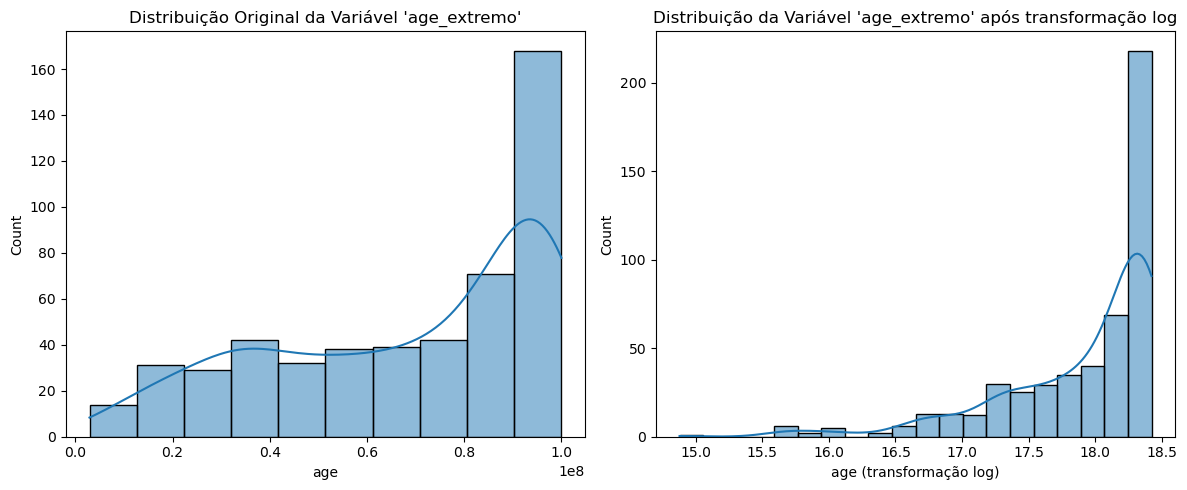

In [39]:
# Exemplo com Log Transformation
import numpy as np
df['age_extremo'] = df['age']* 1000000 #multiplica age por 1 milhão
df['age_log'] = np.log(df['age_extremo'] + 1) # o +1 é para evitar o log(0) (não existe log de zero nem número negativo)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['age_extremo'], kde=True)
plt.title("Distribuição Original da Variável 'age_extremo'")
plt.xlabel("age")

plt.subplot(1, 2, 2)
sns.histplot(df['age_log'], kde=True)
plt.title("Distribuição da Variável 'age_extremo' após transformação log")
plt.xlabel("age (transformação log)")

plt.tight_layout()
plt.show()

## Normalização
A normalização, por outro lado, é um processo específico de transformação que ajusta as variáveis para que estejam dentro de um intervalo comum, geralmente entre 0 e 1. Isso é feito para que os valores numéricos tenham uma escala uniforme, o que é especialmente importante em algoritmos que utilizam métricas de distância, como o _k-NN_ ou redes neurais. A normalização minimiza a influência de variáveis com escalas maiores sobre variáveis com escalas menores, criando uma base mais equilibrada para comparações ou análises multivariadas.

In [11]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Selecionar variáveis numéricas para normalização e padronização
numeric_features = ['crim', 'zn', 'indus', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat']


### Normalização Min-Max

A **normalização Min-Max** é uma técnica de escalonamento que transforma variáveis numéricas para um intervalo específico, geralmente entre 0 e 1. Isso é feito ajustando os valores com base no mínimo e máximo da variável. A fórmula para normalização Min-Max é:

![Equação](https://learn.microsoft.com/pt-br/azure/machine-learning/component-reference/media/module/aml-normalization-minmax.png?view=azureml-api-2)

Essa transformação é útil quando se quer evitar que variáveis com diferentes escalas impactem desproporcionalmente os resultados da análise ou modelagem.

#### Exemplo

Considere os seguintes valores em uma variável `idade`: 18, 35, 50, 67, 80.

1. **Valor mínimo** (`X_min`) = 18
2. **Valor máximo** (`X_max`) = 80

Aplicando a normalização Min-Max para o valor 50:

z = (50 - 18)/(80 - 18) = 32/62 = 0.516


| Idade Original | Idade Normalizada |
|----------------|-------------------|
| 18             | 0.0               |
| 35             | 0.274             |
| 50             | 0.516             |
| 67             | 0.790             |
| 80             | 1.0               |

Após a normalização, todos os valores estão no intervalo [0, 1].


In [12]:
# Normalização Min-Max
scaler_minmax = MinMaxScaler()
df_normalized = df.copy()
df_normalized[numeric_features] = scaler_minmax.fit_transform(df_normalized[numeric_features])
df_normalized.head()


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,zona_inseguro,zona_seguro
0,0.000000,0.18,0.067815,0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680,24.0,False,True
1,0.000236,0.00,0.242302,0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470,21.6,False,True
2,0.000236,0.00,0.242302,0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466,34.7,False,True
3,0.000293,0.00,0.063050,0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389,33.4,False,True
4,0.000705,0.00,0.063050,0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338,36.2,False,True


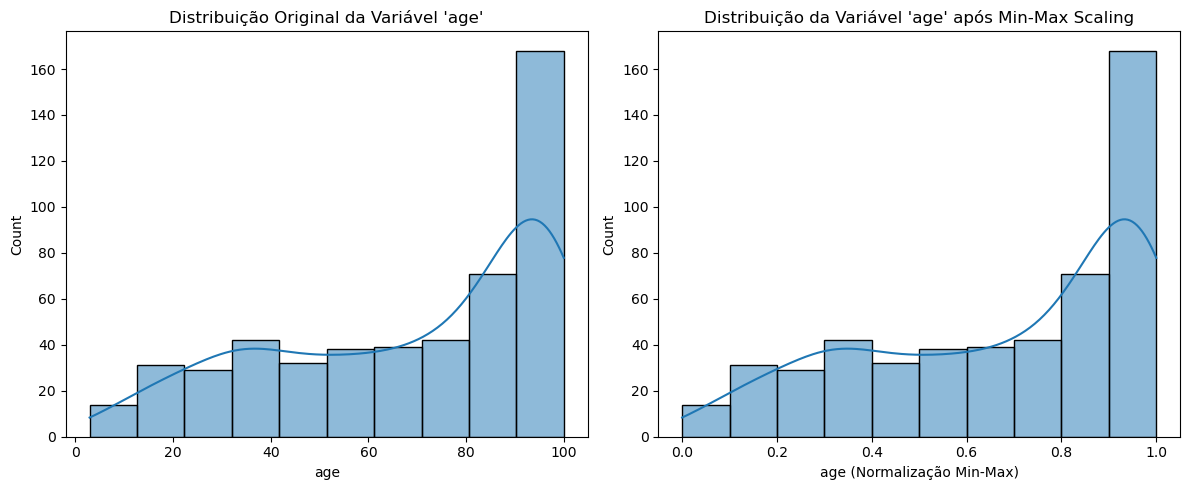

In [13]:
# Comparar distribuições antes e depois da normalização
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['age'], kde=True)
plt.title("Distribuição Original da Variável 'age'")
plt.xlabel("age")

plt.subplot(1, 2, 2)
sns.histplot(df_normalized['age'], kde=True)
plt.title("Distribuição da Variável 'age' após Min-Max Scaling")
plt.xlabel("age (Normalização Min-Max)")

plt.tight_layout()
plt.show()

### Normalização Standard Scaling

A **normalização Standard Scaling**, também conhecida como padronização, transforma os dados para que tenham uma média de 0 e um desvio padrão de 1. Isso é feito ajustando cada valor com base na média e desvio padrão da variável. A fórmula para o Standard Scaling é:

![Equação](https://journaldev.nyc3.cdn.digitaloceanspaces.com/2020/10/Standardization.png)


onde:
- *x* é o valor original,
- *μ* é a média dos valores da variável,
- *σ* é o desvio padrão dos valores da variável.

Essa técnica é útil em algoritmos sensíveis a escala, como métodos baseados em distância (ex.: KNN) e modelos de regressão.

#### Exemplo

Considere os seguintes valores de uma variável `altura` (em cm): 160, 170, 180, 190, 200.

1. **Média** (μ) = 180
2. **Desvio Padrão** (σ) = 15.81

Aplicando o Standard Scaling ao valor 170:

z = (170 - 180)/(15.81) = -0.63

| Altura Original | Altura Padronizada |
|-----------------|--------------------|
| 160             | -1.27              |
| 170             | -0.63              |
| 180             | 0.0                |
| 190             | 0.63               |
| 200             | 1.27               |

Após a padronização, os valores têm média 0 e desvio padrão 1, facilitando comparações em algoritmos de machine learning.


In [14]:
# Padronização (Standard Scaling)
scaler_standard = StandardScaler()
df_standardized = df.copy()
df_standardized[numeric_features] = scaler_standard.fit_transform(df_standardized[numeric_features])
df_standardized.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,zona_inseguro,zona_seguro
0,-0.419782,0.284830,-1.287909,0,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,24.0,False,True
1,-0.417339,-0.487722,-0.593381,0,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,21.6,False,True
2,-0.417342,-0.487722,-0.593381,0,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,34.7,False,True
3,-0.416750,-0.487722,-1.306878,0,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,33.4,False,True
4,-0.412482,-0.487722,-1.306878,0,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,36.2,False,True


#### Analisando os dados após as normalizações

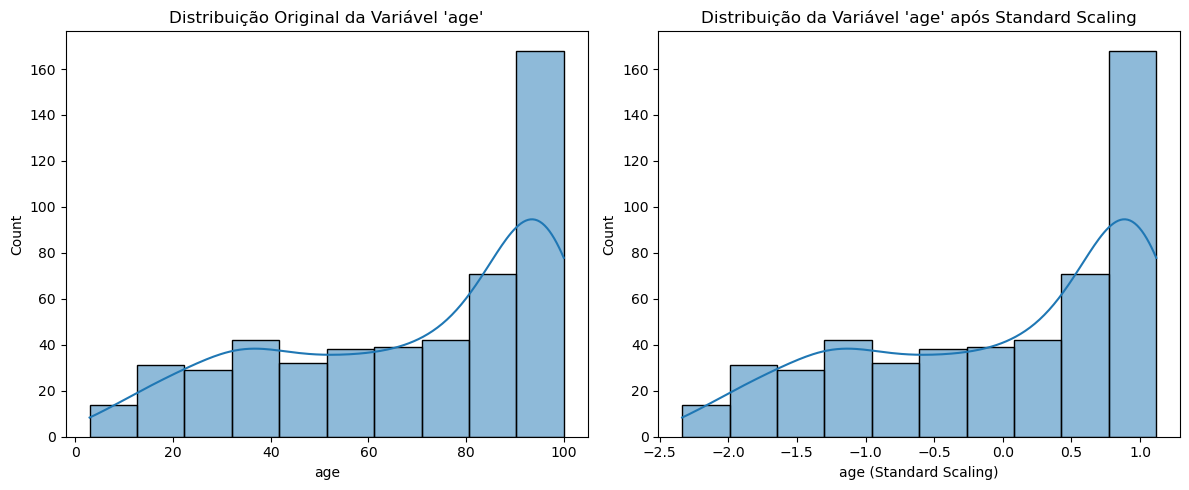

In [31]:
# Comparar distribuições antes e depois da normalização
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['age'], kde=True)
plt.title("Distribuição Original da Variável 'age'")
plt.xlabel("age")

plt.subplot(1, 2, 2)
sns.histplot(df_standardized['age'], kde=True)
plt.title("Distribuição da Variável 'age' após Standard Scaling")
plt.xlabel("age (Standard Scaling)")

plt.tight_layout()
plt.show()

In [23]:
# Comparar estatísticas antes e depois das transformações
print("Estatísticas Originais:")
df.describe()

Estatísticas Originais:


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,valor_acima_media
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806,0.413043
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104,0.492868
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000,0.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000,0.000000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000,0.000000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000,1.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000,1.000000


In [25]:
print("\nEstatísticas Após Normalização Min-Max:")
df_normalized.describe()


Estatísticas Após Normalização Min-Max:


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,valor_acima_media
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,0.040544,0.113636,0.391378,0.069170,0.349167,0.521869,0.676364,0.242381,0.371713,0.422208,0.622929,0.898568,0.301409,22.532806,0.413043
std,0.096679,0.233225,0.251479,0.253994,0.238431,0.134627,0.289896,0.191482,0.378576,0.321636,0.230313,0.230205,0.197049,9.197104,0.492868
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000
25%,0.000851,0.000000,0.173387,0.000000,0.131687,0.445392,0.433831,0.088259,0.130435,0.175573,0.510638,0.945730,0.144040,17.025000,0.000000
50%,0.002812,0.000000,0.338343,0.000000,0.314815,0.507281,0.768280,0.188949,0.173913,0.272901,0.686170,0.986232,0.265728,21.200000,0.000000
75%,0.041258,0.125000,0.646628,0.000000,0.491770,0.586798,0.938980,0.369088,1.000000,0.914122,0.808511,0.998298,0.420116,25.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,50.000000,1.000000


In [26]:
print("\nEstatísticas Após Padronização:")
df_standardized.describe()


Estatísticas Após Padronização:


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,valor_acima_media
count,5.060000e+02,5.060000e+02,5.060000e+02,506.000000,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,506.000000,5.060000e+02,5.060000e+02,5.060000e+02,506.000000,506.000000
mean,-1.123388e-16,7.898820e-17,2.106352e-16,0.069170,-1.965929e-16,-1.088282e-16,-1.474446e-16,-8.425408e-17,-1.123388e-16,0.000000,-4.212704e-16,-7.442444e-16,-3.089316e-16,22.532806,0.413043
std,1.000990e+00,1.000990e+00,1.000990e+00,0.253994,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990,1.000990e+00,1.000990e+00,1.000990e+00,9.197104,0.492868
min,-4.197819e-01,-4.877224e-01,-1.557842e+00,0.000000,-1.465882e+00,-3.880249e+00,-2.335437e+00,-1.267069e+00,-9.828429e-01,-1.313990,-2.707379e+00,-3.907193e+00,-1.531127e+00,5.000000,0.000000
25%,-4.109696e-01,-4.877224e-01,-8.676906e-01,0.000000,-9.130288e-01,-5.686303e-01,-8.374480e-01,-8.056878e-01,-6.379618e-01,-0.767576,-4.880391e-01,2.050715e-01,-7.994200e-01,17.025000,0.000000
50%,-3.906665e-01,-4.877224e-01,-2.110985e-01,0.000000,-1.442174e-01,-1.084655e-01,3.173816e-01,-2.793234e-01,-5.230014e-01,-0.464673,2.748590e-01,3.811865e-01,-1.812536e-01,21.200000,0.000000
75%,7.396560e-03,4.877224e-02,1.015999e+00,0.000000,5.986790e-01,4.827678e-01,9.067981e-01,6.623709e-01,1.661245e+00,1.530926,8.065758e-01,4.336510e-01,6.030188e-01,25.000000,1.000000
max,9.933931e+00,3.804234e+00,2.422565e+00,1.000000,2.732346e+00,3.555044e+00,1.117494e+00,3.960518e+00,1.661245e+00,1.798194,1.638828e+00,4.410519e-01,3.548771e+00,50.000000,1.000000


### Outras Técnicas de Normalização de Dados

1. **Max Abs Scaling**: Escala os dados pelo valor absoluto máximo de cada variável, mantendo os valores dentro do intervalo [-1, 1]. É útil para dados que já estão centrados em torno de zero.

2. **Robust Scaling**: Baseado na mediana e nos quartis (intervalo interquartil - IQR), o Robust Scaling reduz o impacto de outliers e ajusta os dados a uma escala mais resistente a valores extremos.

3. **Decimal Scaling**: Divide cada valor por uma potência de 10, dependendo da magnitude dos valores, para trazer todos os valores para uma faixa reduzida.

4. **L2 Normalization**: Também chamada de normalização por norma, ajusta os dados para que a soma das quadraturas seja igual a 1. Comum em algoritmos de machine learning e processamento de vetores, especialmente em análises de similaridade.

5. **Log Transformation**: Aplica a função logarítmica para comprimir a escala dos dados, útil para variáveis com distribuições assimétricas ou com valores altamente discrepantes.

6. **Z-Score Normalization**: Variante do Standard Scaling que também ajusta os dados com média 0 e desvio padrão 1, mas é aplicado a cada observação em relação ao conjunto completo, comum em estatísticas inferenciais.

7. **Quantile Transformation**: Transforma a distribuição dos dados para seguir uma distribuição uniforme ou normal, aplicando uma transformação baseada em percentis.

Essas técnicas são escolhidas de acordo com a natureza dos dados e os requisitos da análise ou modelo a ser aplicado.
